In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/akanksha goel/OneDrive/Desktop/ml r/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Score')

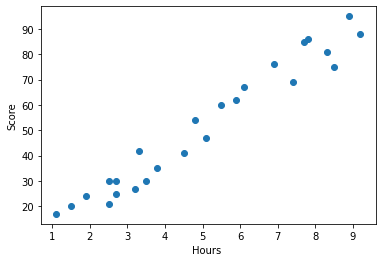

In [5]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel("Hours ")
plt.ylabel("Score")

In [6]:
X = df['Hours']
Y = df['Scores']

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
xmean = np.mean(X)
ymean = np.mean(Y)

In [9]:
n = len(X)
covar = (np.sum(X*Y)-n*xmean*ymean)/n
var   = (np.sum(X*X)-n*xmean*xmean)/n
Q1 = covar/var
Q0 = ymean - xmean*Q1
print("Q1 :",Q1)
print("Q0 :",Q0)

Q1 : 9.775803390787473
Q0 : 2.4836734053731817


In [10]:
ypred = Q0 + Q1*X

In [11]:
print(ypred,Y)

[26.92318188 52.3402707  33.76624426 85.57800223 36.69898527 17.14737849
 92.4210646  56.25059205 83.62284155 28.87834256 77.75735951 60.16091341
 46.47478866 34.74382459 13.23705714 89.48832358 26.92318188 21.05769985
 62.11607409 74.8246185  28.87834256 49.40752968 39.63172629 69.9367168
 78.73493985] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


WITHOUT REGULARISATION

In [12]:
def cost_func(y_actual, y_predicted):
    cost = sum((y_predicted - y_actual)**2)/(2*len(X))
    return cost

In [13]:
def gradient_descent(X, Y, iters=1000, lr=0.01, stopping_threshold=1e-6):
    initial_M = 0.1
    initial_C = 0.001
    
    Ms = []
    Cs = []
    
    costs =[]
    
    previous_cost = 0
    y_predicted=0
    for i in range(iters):
        y_predicted  = (initial_M*(X)) + initial_C
    
        present_cost     = cost_func(Y, y_predicted)
    
        if((abs(present_cost - previous_cost)) < stopping_threshold )==True:
            break
    
        previous_cost = present_cost
        costs.append(present_cost)
        
        partial_derM = (1/(len(X)))*np.sum((y_predicted - Y)*X)
        partial_derC = (1/(len(X)))*np.sum(y_predicted - Y)
        
        initial_M = initial_M - lr *(partial_derM)
        initial_C = initial_C - lr *(partial_derC)
        
        Ms.append(initial_M)
        Cs.append(initial_C)
    
    costs = np.array(costs)
    Ms = np.array(Ms)
    Cs = np.array(Cs)
    return initial_M,initial_C,Ms,Cs,costs,y_predicted


In [14]:
M,C,Ms,Cs,costs,y_predicted = gradient_descent(X,Y)

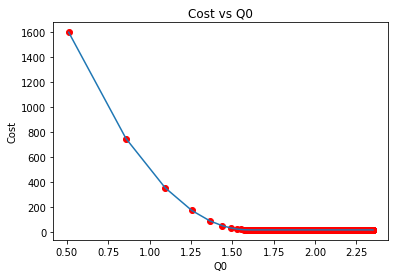

In [16]:
plt.plot(Cs,costs)
plt.title("Cost vs Q0")
plt.ylabel("Cost")
plt.xlabel("Q0")
plt.scatter(Cs, costs, marker='o', color='red')

Text(0.5, 1.0, 'Best Fit Line')

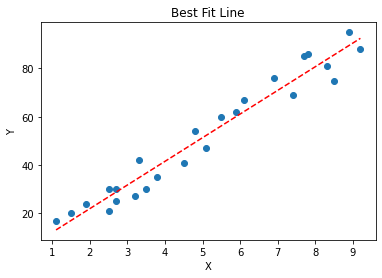

In [17]:
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='red',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Best Fit Line")